In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/sreekeshiyer/dmbi_aids_datasets/main/USA_Housing.csv")

df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


# Normality Tests

## Shapiro-Wilk Test

H0 : Price data has normal distribution<br>
H1 : Price data does not have normal distribution

α = 0.05

In [2]:
from scipy.stats import shapiro

stat, p = shapiro(df["Price"])
print("stat=%.3f, p=%.3f\n" % (stat, p))

if p>0.05:
  print("Probably Gaussian")
else:
  print("Probably not Gaussian")

stat=1.000, p=0.954

Probably Gaussian


**Inference**: p-value=0.954 is more than 0.05. Thus, we fail to reject H0.

## D’Agostino’s K^2 Test

H0 : Price data has normal distribution<br>
H1 : Price data does not have normal distribution

α = 0.05

In [3]:
from scipy.stats import normaltest

stat, p = normaltest(df["Price"])
print("stat=%.3f, p=%.3f\n" % (stat, p))

if p>0.05:
  print("Probably Gaussian")
else:
  print("Probably not Gaussian")


stat=0.618, p=0.734

Probably Gaussian


**Inference**: p-value=0.734 is more than 0.05. Thus, we fail to reject H0.

## Anderson-Darling Test 

H0 : Price data has normal distribution<br>
H1 : Price data does not have normal distribution

α = 0.05

In [4]:
from scipy.stats import anderson

result = anderson(df["Price"])
print("stat=%.3f" % (result.statistic))

for i in range(len(result.critical_values)):
  sig_lev, crit_val = result.significance_level[i], result.critical_values[i]
  if result.statistic < crit_val:
    print(f"Probably Gaussian: {crit_val} critical value at {sig_lev} level of significance")
  else:
    print(f"Probably not Gaussian: {crit_val} critical value at {sig_lev} level of significance")


stat=0.174
Probably Gaussian: 0.576 critical value at 15.0 level of significance
Probably Gaussian: 0.655 critical value at 10.0 level of significance
Probably Gaussian: 0.786 critical value at 5.0 level of significance
Probably Gaussian: 0.917 critical value at 2.5 level of significance
Probably Gaussian: 1.091 critical value at 1.0 level of significance


**Inference**: From above output, we see that, at each significance level, the Price data has a Gaussian Normal Distribution

# Correlation Tests

## Pearson’s Correlation Coefficient

H0 : Attributes are uncorrelated<br>
H1 : Attributes are correlated

In [5]:
from scipy.stats import pearsonr

# Convert dataframe into series
list1 = df['Avg. Area Income']
list2 = df['Price']

# Apply the pearsonr()
corr, p = pearsonr(list1, list2)
print("Pearson's correlation: %.3f" % corr)

alpha = 0.05
if p > alpha:
	print('Attributes are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Attributes are correlated (reject H0) p=%.3f' % p)


Pearson's correlation: 0.640
Attributes are correlated (reject H0) p=0.000


**Inference**: The statistical test reports a strong positive correlation with a value of 0.640. The p-value is close to zero, which means that the likelihood of observing the data given that the attributes are uncorrelated is very unlikely and that we can reject the null hypothesis that the attributes are uncorrelated.

## Spearman’s Rank Correlation

H0 : Attributes are uncorrelated<br>
H1 : Attributes are correlated

In [6]:
from scipy.stats import spearmanr

# Convert dataframe into series
list1 = df['Avg. Area Income']
list2 = df['Price']

# Apply the pearsonr()
corr, p = spearmanr(list1, list2)
print("Spearman's correlation: %.3f" % corr)

alpha = 0.05
if p > alpha:
	print('Attributes are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Attributes are correlated (reject H0) p=%.3f' % p)

Spearman's correlation: 0.620
Attributes are correlated (reject H0) p=0.000


**Inference**: The statistical test reports a strong positive correlation with a value of 0.620. The p-value is close to zero, which means that the likelihood of observing the data given that the samples are uncorrelated is very unlikely and that we can reject the null hypothesis that the samples are uncorrelated.

## Kendall’s Rank Correlation 

H0 : Attributes are uncorrelated<br>
H1 : Attributes are correlated

In [7]:
from scipy.stats import kendalltau

# Convert dataframe into series
list1 = df['Avg. Area Income']
list2 = df['Price']

# Apply the pearsonr()
corr, p = kendalltau(list1, list2)
print("Kendall's Rank correlation: %.3f" % corr)

alpha = 0.05
if p > alpha:
	print('Attributes are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Attributes are correlated (reject H0) p=%.3f' % p)

Kendall's Rank correlation: 0.441
Attributes are correlated (reject H0) p=0.000


**Inference**: The statistical test reports a positive correlation with a value of 0.441. The p-value is close to zero, which means that the likelihood of observing the data given that the samples are uncorrelated is very unlikely and that we can reject the null hypothesis that the samples are uncorrelated.

## Chi-Squared Test

H0 : Attributes are uncorrelated<br>
H1 : Attributes are correlated

In [8]:
from scipy.stats import chi2_contingency

# Convert dataframe into series
list1 = df['Avg. Area Number of Bedrooms']
list2 = df['Price']

stat, p, dof, expected = chi2_contingency(list1, list2)
print("stat=%.3f, p=%.3f\n" % (stat, p))

alpha = 0.05
if p > alpha:
  print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
  print('Samples are correlated (reject H0) p=%.3f' % p)

stat=0.000, p=1.000

Samples are uncorrelated (fail to reject H0) p=1.000


**Inference**: From the above calculations, the p-value is 1.000 which is more than the alpha(0.5) then we fail to reject the null hypothesis i.e. we have sufficient evidence to say that sample do not have a significant relation.

# Stationary Tests

## Augmented Dickey-Fuller Test

H0 : Time series can be represented by a unit root i.e. it is not stationary<br>
H1 : Time series is stationary

ADF Statistic: 3.1451856893067287
n_lags: 15
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476



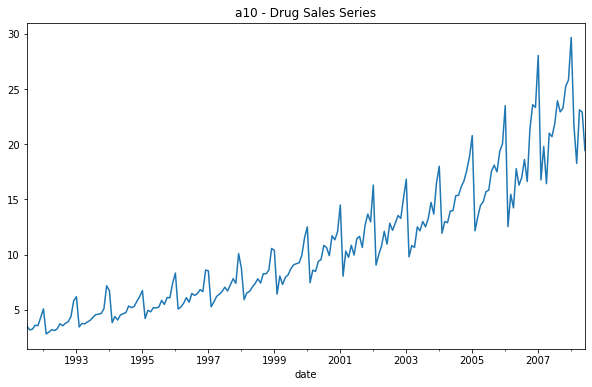

In [9]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
%matplotlib inline

url = 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'
df = pd.read_csv(url, parse_dates=['date'], index_col='date')
series = df.loc[:, 'value'].values
df.plot(figsize=(10,6), legend=None, title='a10 - Drug Sales Series');

# ADF Test
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    
print()

**Inference**: The p-value obtained is greater than the significance level of 0.05 and the ADF statistic is higher than any of the critical values. Hence, there we fail to reject the null hypothesis. So, the time series is in fact non-stationary.

## Kwiatkowski-Phillips-Schmidt-Shin

H0 : Time series trend is stationary<br>
H1 : Time series can be represented by a unit root i.e. it is not stationary

KPSS Statistic: 2.0131256386303322
n_lags: 9
p-value: 0.01
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:2019: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


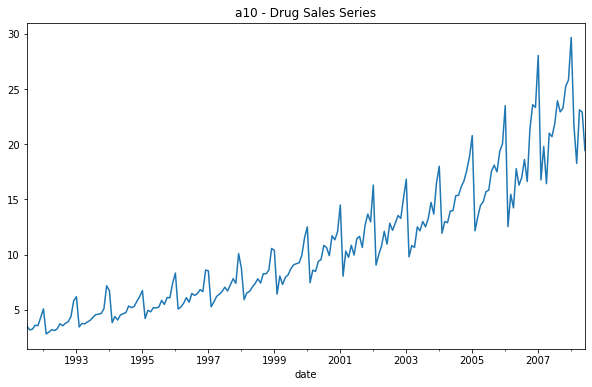

In [10]:
from statsmodels.tsa.stattools import kpss
import pandas as pd
import numpy as np
%matplotlib inline

url = 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'
df = pd.read_csv(url, parse_dates=['date'], index_col='date')
series = df.loc[:, 'value'].values
df.plot(figsize=(10,6), legend=None, title='a10 - Drug Sales Series');

# KPSS Test
result = kpss(series)
print(f'KPSS Statistic: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    
print()


**Inference**: The p-value (0.01) obtained is lesser than the significance level of 0.05 and the KPSS statistic is higher than any of the critical values. Hence, there we reject the null hypothesis. So, the time series is non-stationary.

# Parametric Statistical Hypothesis Tests 

##Student’s t-test

H0 : μ1 == μ2 <br>
H1 : μ1 != μ2

In [11]:
from scipy.stats import ttest_ind

from sklearn.model_selection import train_test_split
train, test = train_test_split(df,test_size=0.3,random_state=1)

stat, p = ttest_ind(train, test)
print('stat=%.3f, p=%.3f' % (stat, p))
 
if p > 0.05:
	print('Fail to reject null hypothesis i.e. the means are equal.')
else:
	print('Reject the null hypothesis i.e. the means are not equal.')

stat=0.866, p=0.387
Fail to reject null hypothesis i.e. the means are equal.


**Inference**: We find that p-value (0.387) is greater than the significance level 0.05, hence we fail to reject the null hypothesis, i.e. the means are equal.

## Paired Student’s t-test 

H0 : μ1 == μ2 <br>
H1 : μ1 != μ2

In [12]:
from scipy.stats import ttest_rel

df = pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/blood_pressure.csv")

# Convert dataframe into series
list1 = df['bp_before']
list2 = df['bp_after']

stat, p = ttest_rel(list1, list2)
print('stat=%.3f, p=%.3f' % (stat, p))
 
if p > 0.05:
	print('Fail to reject null hypothesis i.e. the means are equal.')
else:
	print('Reject the null hypothesis i.e. the means are not equal.')

stat=3.337, p=0.001
Reject the null hypothesis i.e. the means are not equal.


**Inference**: We find that p-value (0.001) is lesser than the significance level 0.05, hence we reject the null hypothesis, i.e. the means are not equal.

## Analysis of Variance Test (ANOVA) 

**Null hypothesis**: Groups means are equal (no variation in means of groups)
H0: μ1=μ2=…=μp <br>
**Alternative hypothesis**: At least, one group mean is different from other groups
H1: All μ are not equal

In [13]:
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
mod = ols('value ~ C(treatments)', data=df_melt).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq    df         F    PR(>F)
C(treatments)  3010.95   3.0  17.49281  0.000026
Residual        918.00  16.0       NaN       NaN


**Inference**: The p value obtained from ANOVA analysis is less than 0.05, and therefore, we reject H0 i.e. the group means are different from each other.

## Repeated Measures ANOVA Test

**Null hypothesis**: Groups means are equal (no variation in means of groups)
H0: μ1=μ2=…=μp <br>
**Alternative hypothesis**: At least, one group mean is different from other groups
H1: All μ are not equal

In [14]:
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/plants_leaves.csv")
# reshape the dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['Id'], value_vars=['W1', 'W2', 'W3', 'W4', 'W5'])
# replace column names
df_melt.columns = ['Id', 'time_points', 'leaves']

try:
  import pingouin as pg
except:
  % pip install pingouin
  import pingouin as pg
pg.rm_anova(dv='leaves', within='time_points', subject='Id', data=df_melt, detailed=True)

,Source,SS,DF,MS,F,p-unc,np2,eps
0,time_points,108.24,4,27.060,146.27027,2.214820e-12,0.973381,0.541964
1,Error,2.96,16,0.185,NaN,NaN,NaN,NaN


**Inference**: The p value obtained from Repeated Measures ANOVA analysis is less than 0.05, and therefore, we reject H0 i.e. the group means are different from each other.

# Nonparametric Statistical Hypothesis Tests 

## Mann-Whitney U Test

H0 : There is no difference between the distributions of the data samples <br>
H1 : There is likely some difference between the samples

In [15]:
from scipy.stats import mannwhitneyu

df = pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/blood_pressure.csv")

# Convert dataframe into series
list1 = df['bp_before']
list2 = df['bp_after']

stat, p = mannwhitneyu(list1, list2)
print('stat=%.3f, p=%.3f' % (stat, p))
 
if p > 0.05:
	print('Fail to reject null hypothesis i.e. the means are equal.')
else:
	print('Reject the null hypothesis i.e. the means are not equal.')

stat=8849.000, p=0.002
Reject the null hypothesis i.e. the means are not equal.


**Inference**: Since p value is less than 0.05, we reject the H0 i.e. there is difference between the samples.

## Wilcoxon Signed-Rank Test

H0 : There is no difference between the distributions of the data samples <br>
H1 : There is likely some difference between the samples

In [16]:
from scipy.stats import wilcoxon

df = pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/blood_pressure.csv")

# Convert dataframe into series
list1 = df['bp_before']
list2 = df['bp_after']

stat, p = wilcoxon(list1, list2)
print('stat=%.3f, p=%.3f' % (stat, p))
 
if p > 0.05:
	print('Fail to reject null hypothesis i.e. the means are equal.')
else:
	print('Reject the null hypothesis i.e. the means are not equal.')

stat=2234.500, p=0.001
Reject the null hypothesis i.e. the means are not equal.


**Inference**: Since p value is less than 0.05, we reject the H0 i.e. there is difference between the samples.

## Kruskal-Wallis H Test

H0 : There is no difference between the distributions of the data samples <br>
H1 : There is likely some difference between the samples

In [17]:
from scipy.stats import kruskal

df = pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/blood_pressure.csv")

# Convert dataframe into series
list1 = df['bp_before']
list2 = df['bp_after']

stat, p = kruskal(list1, list2)
print('stat=%.3f, p=%.3f' % (stat, p))
 
if p > 0.05:
	print('Fail to reject null hypothesis i.e. the means are equal.')
else:
	print('Reject the null hypothesis i.e. the means are not equal.')

stat=9.409, p=0.002
Reject the null hypothesis i.e. the means are not equal.


**Inference**: Since p value is less than 0.05, we reject the H0 i.e. there is difference between the samples.

## Friedman Test

H0 : Multiple paired samples have the same distribution<br>
H1 : One or more of the paired samples has a different distribution

In [18]:
from scipy.stats import friedmanchisquare

# Convert dataframe into series
list1 = df['bp_before']
list2 = df['bp_after']
list3 = df['bp_before']

stat, p = friedmanchisquare(list1, list2, list3)
print('stat=%.4f, p=%.4f' % (stat, p))

if p < 0.05:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')


stat=15.5172, p=0.0004
Reject Null Hypothesis (Significant difference between two samples)


**Inference**: Since p-value is less than 0.05, we reject H0 i.e. there is difference between one or more pairs of samples